<a href="https://colab.research.google.com/github/ValentinBarco/UPSO-ML-BD/blob/main/SVM_y_Ensamble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

def plot_decision_boundary(clf, X, y, ax, title):

    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    ax.set_title(title)



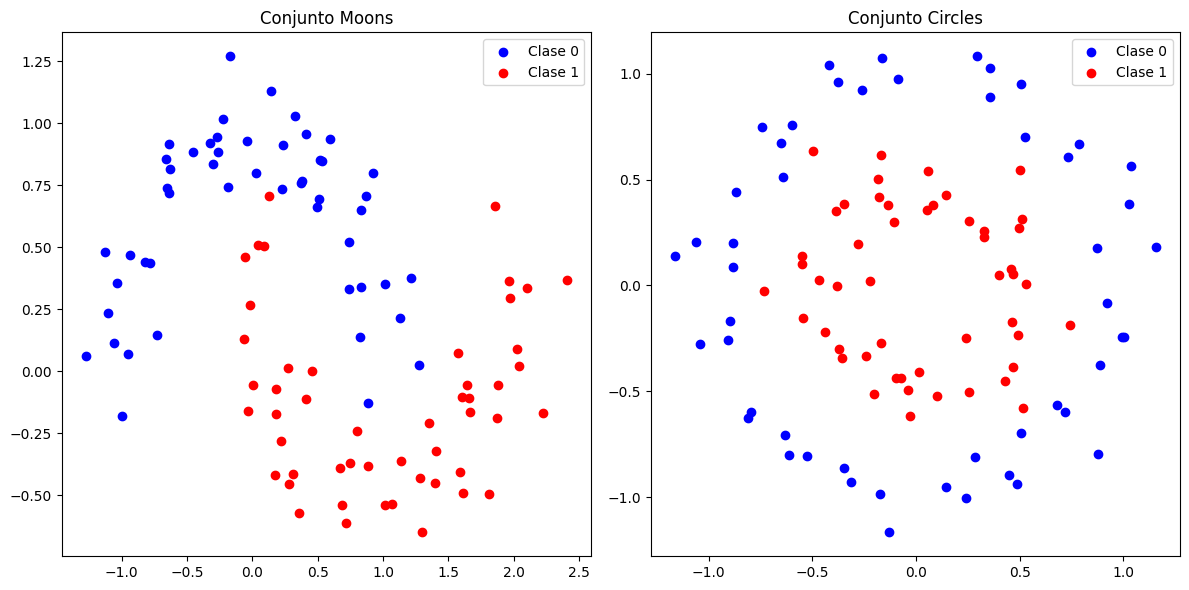

In [2]:
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)
X_circles, y_circles = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].scatter(X_moons[y_moons == 0][:, 0], X_moons[y_moons == 0][:, 1], color='blue', label='Clase 0')
axes[0].scatter(X_moons[y_moons == 1][:, 0], X_moons[y_moons == 1][:, 1], color='red', label='Clase 1')
axes[0].set_title('Conjunto Moons')
axes[0].legend()

axes[1].scatter(X_circles[y_circles == 0][:, 0], X_circles[y_circles == 0][:, 1], color='blue', label='Clase 0')
axes[1].scatter(X_circles[y_circles == 1][:, 0], X_circles[y_circles == 1][:, 1], color='red', label='Clase 1')
axes[1].set_title('Conjunto Circles')
axes[1].legend()

plt.tight_layout()
plt.show()

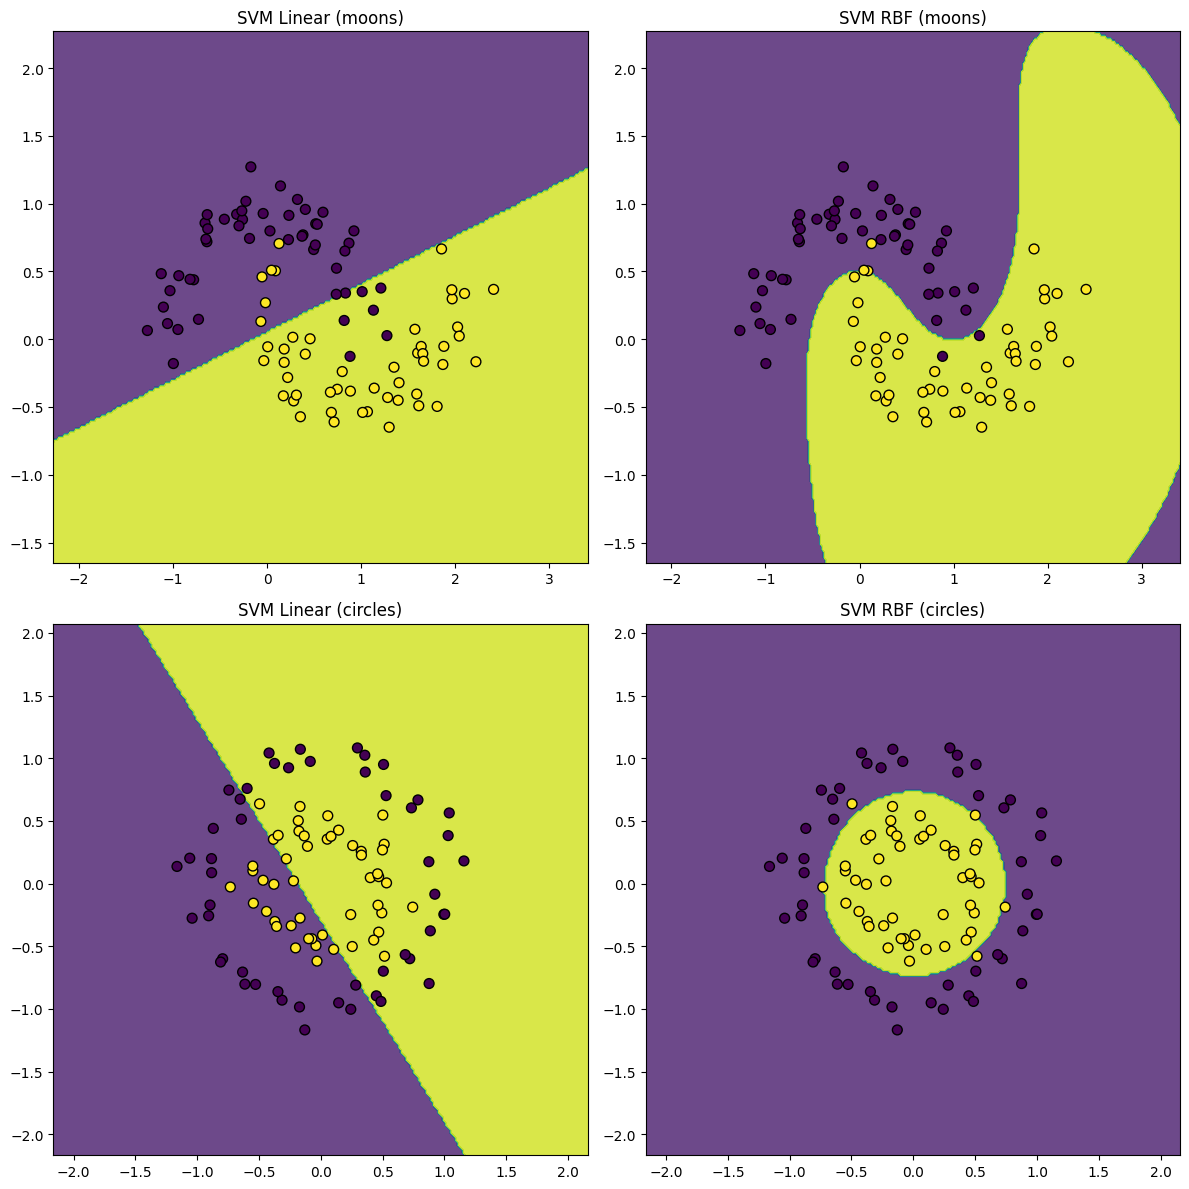

In [3]:



clf_linear_moons = SVC(kernel='linear').fit(X_moons, y_moons)
clf_rbf_moons = SVC(kernel='rbf', gamma=1, C=1).fit(X_moons, y_moons)




clf_linear_circles = SVC(kernel='linear').fit(X_circles, y_circles)
clf_rbf_circles = SVC(kernel='rbf', gamma=2, C=1).fit(X_circles, y_circles)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))


plot_decision_boundary(clf_linear_moons, X_moons, y_moons, axs[0, 0], "SVM Linear (moons)")
plot_decision_boundary(clf_rbf_moons, X_moons, y_moons, axs[0, 1], "SVM RBF (moons)")
plot_decision_boundary(clf_linear_circles, X_circles, y_circles, axs[1, 0], "SVM Linear (circles)")
plot_decision_boundary(clf_rbf_circles, X_circles, y_circles, axs[1, 1], "SVM RBF (circles)")

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df_iris['target'] = iris.target
df_iris['target_names'] = df_iris['target'].map({i:name for i, name in enumerate(iris.target_names)})
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


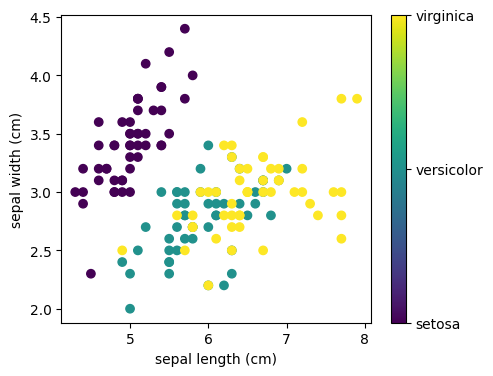

In [5]:
from matplotlib import pyplot as plt


x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])


plt.figure(figsize=(5, 4))
plt.scatter(df_iris.iloc[:, x_index], df_iris.iloc[:, y_index], c=df_iris['target'])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.show()

In [6]:
X, y = df_iris[['sepal length (cm)','sepal width (cm)']].values, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:

    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))

Accuracy using linear: 0.85
Accuracy using rbf: 0.8333333333333334
Accuracy using poly: 0.7833333333333333


Kernel: linear C: 0.1 Gamma: 0.1
Kernel: linear C: 0.1 Gamma: 1
Kernel: linear C: 0.1 Gamma: 10
Kernel: rbf C: 0.1 Gamma: 0.1
Kernel: rbf C: 0.1 Gamma: 1
Kernel: rbf C: 0.1 Gamma: 10
Kernel: linear C: 1 Gamma: 0.1
Kernel: linear C: 1 Gamma: 1
Kernel: linear C: 1 Gamma: 10
Kernel: rbf C: 1 Gamma: 0.1
Kernel: rbf C: 1 Gamma: 1
Kernel: rbf C: 1 Gamma: 10
Kernel: linear C: 10 Gamma: 0.1
Kernel: linear C: 10 Gamma: 1
Kernel: linear C: 10 Gamma: 10
Kernel: rbf C: 10 Gamma: 0.1
Kernel: rbf C: 10 Gamma: 1
Kernel: rbf C: 10 Gamma: 10


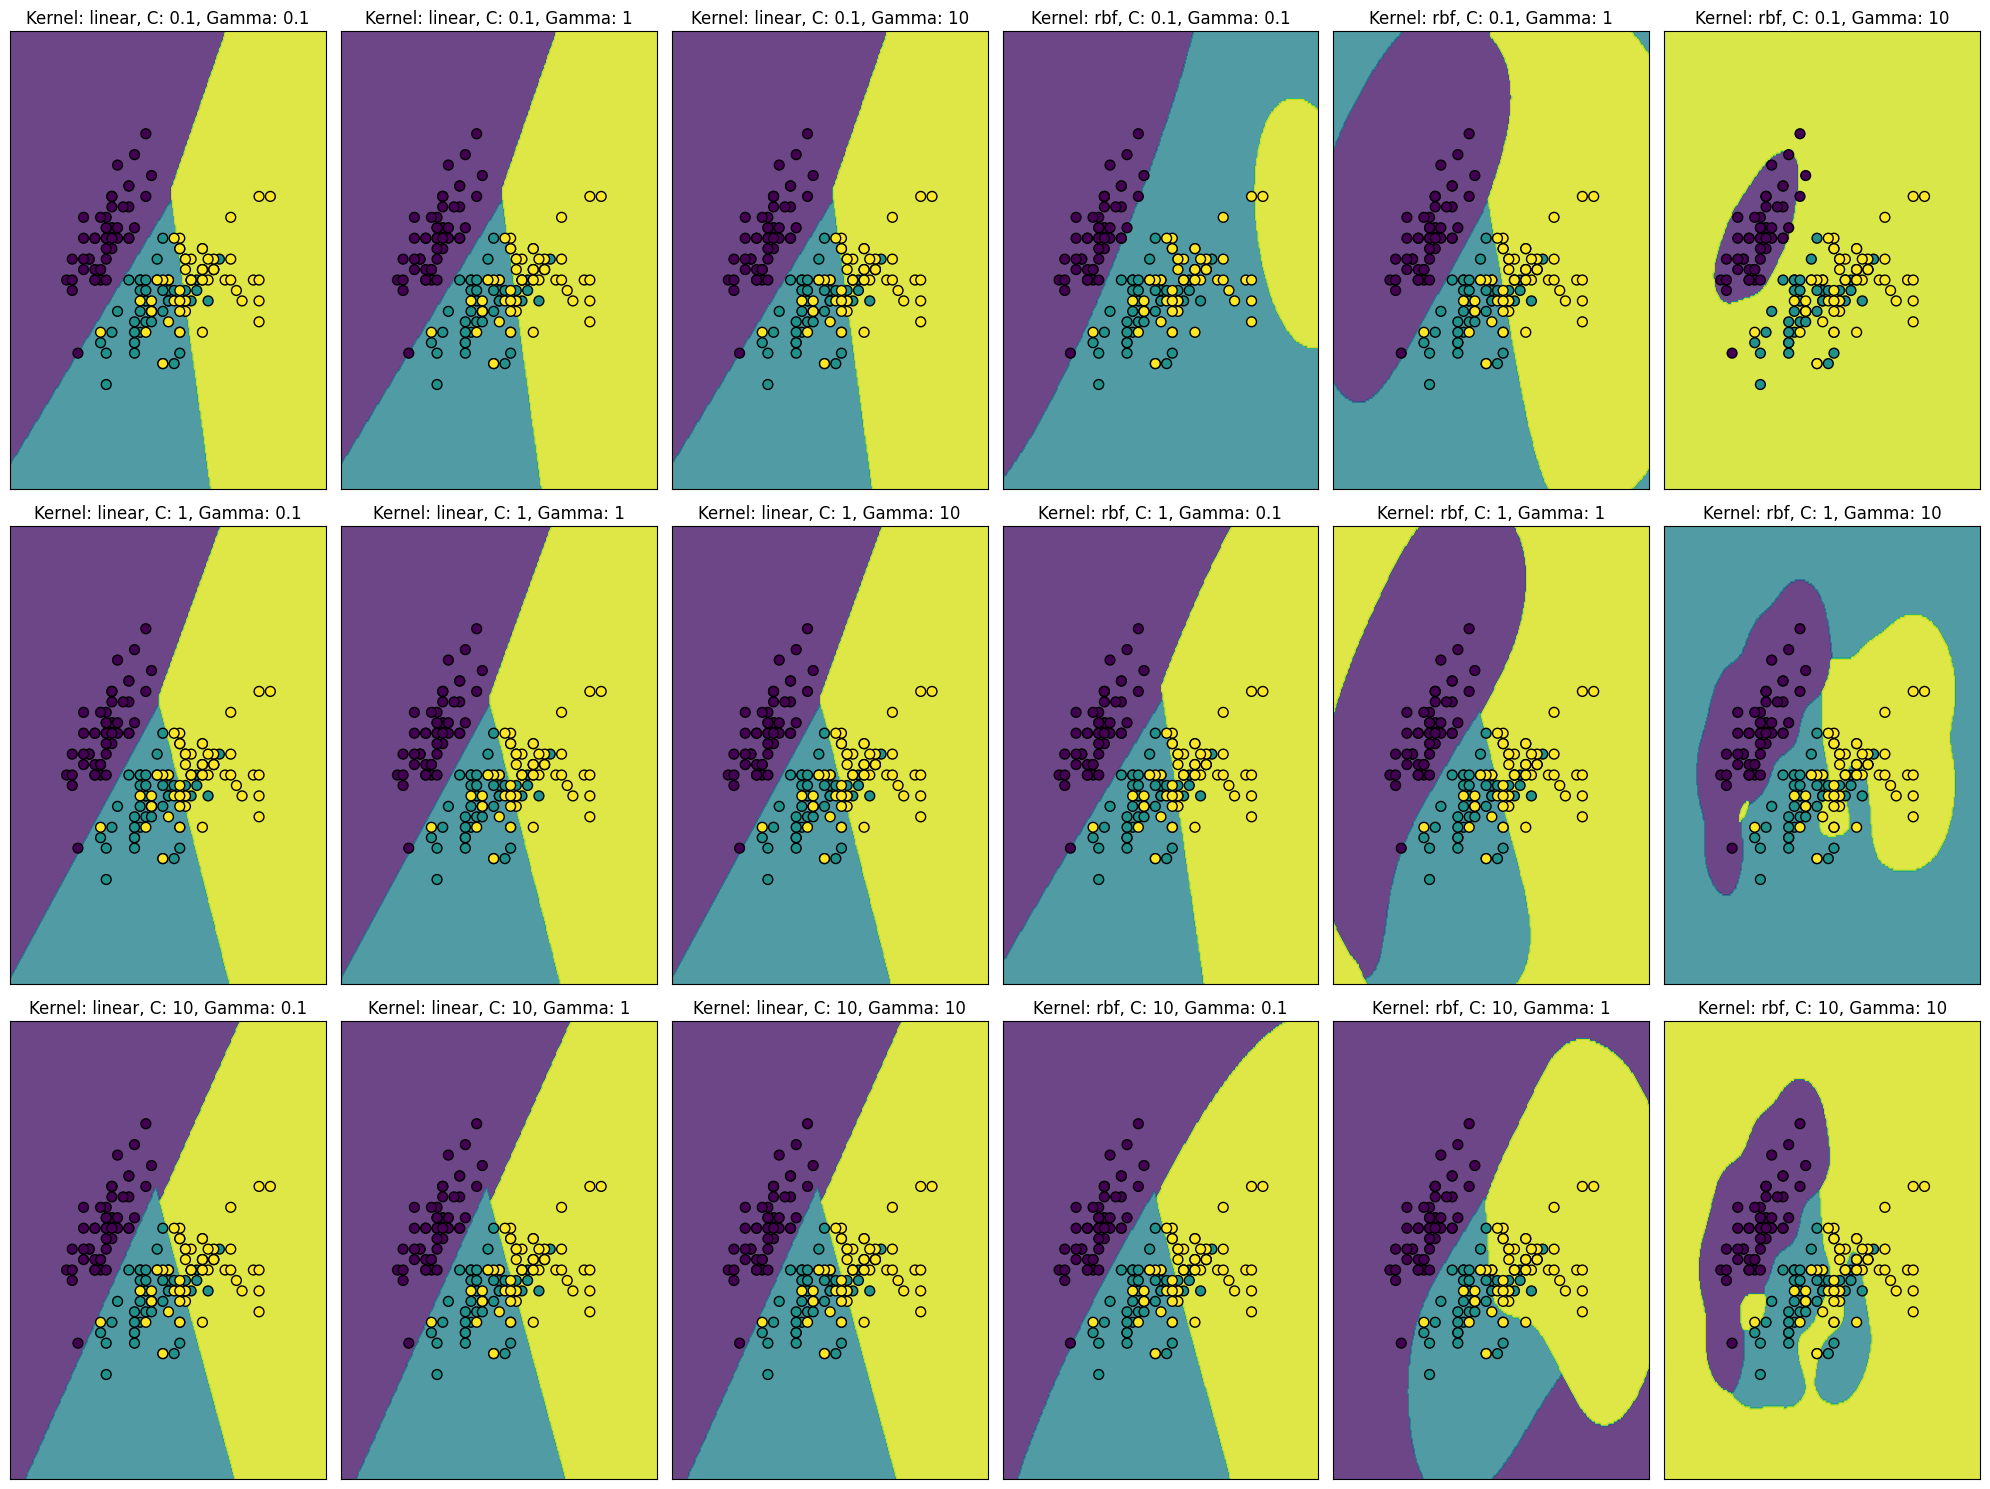

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


iris = load_iris()
data=iris
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X, y = df_iris[['sepal length (cm)', 'sepal width (cm)']].values, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


kernels = ['linear', 'rbf']
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]


fig, axes = plt.subplots(nrows=len(C_values), ncols=len(gamma_values) * len(kernels), figsize=(20,15))

for i, C_val in enumerate(C_values):
    for k, kernel in enumerate(kernels):
        for j, gamma_val in enumerate(gamma_values):

            model = SVC(kernel=kernel, C=C_val, gamma=gamma_val)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)

            print("Kernel:", kernel, "C:", C_val, "Gamma:", gamma_val)


            col_index = j + k * len(gamma_values)
            title = ('Kernel: {}, C: {}, Gamma: {}'.format(kernel, C_val, gamma_val))
            plot_decision_boundary(model, X, y, axes[i, col_index], title)
            axes[i, col_index].set_xticks(())
            axes[i, col_index].set_yticks(())

plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

print("Mejores parámetros:", clf.best_params_)

print("Mejor score:", clf.best_score_)


Mejores parámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Mejor score: 0.7742956172367936


In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC


svc = SVC()


param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}


grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)


Mejores parámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Mejor score: 0.7833333333333334


Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



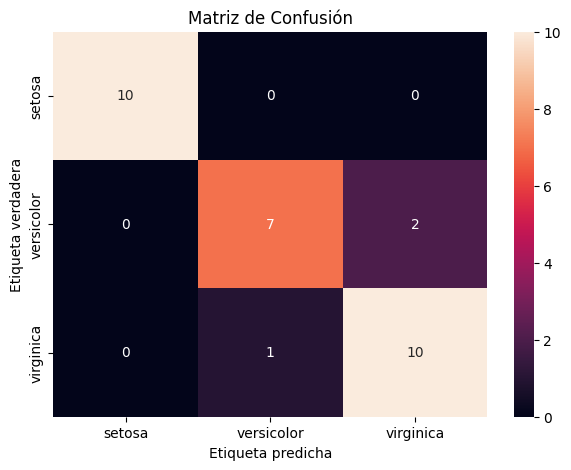

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split



svc_best = SVC(C=1, gamma=0.1, kernel='linear')
svc_best.fit(X_train, y_train)


y_pred = svc_best.predict(X_test)


print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))


c = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()



## ENSABLE

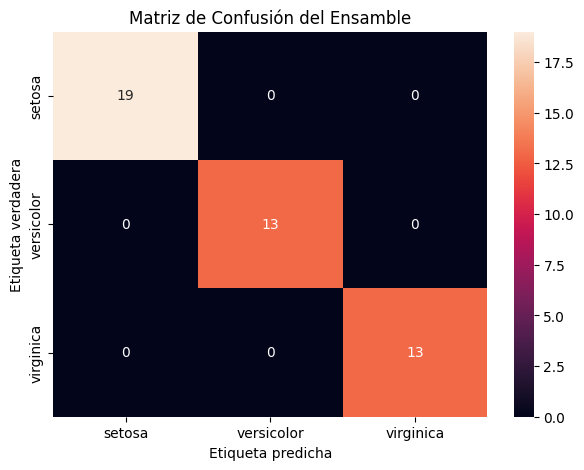

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


data = load_iris()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

svm = SVC(C=1, gamma=0.1, kernel='linear')
svm.fit(X_train, y_train)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


knn_predictions = knn.predict(X_test)
svm_predictions = svm.predict(X_test)
naive_bayes_predictions = naive_bayes.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)

# ENSABLE
final_predictions = []
for k, s, n, dt in zip(knn_predictions, svm_predictions, naive_bayes_predictions, decision_tree_predictions):


    votes = {0: 0, 1: 0, 2: 0}
    votes[k] += 1
    votes[s] += 1
    votes[n] += 1
    votes[dt] += 1


    majority_vote = max(votes, key=votes.get)
    final_predictions.append(majority_vote)


c = confusion_matrix(y_test, final_predictions)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del Ensamble')
plt.show()
